# <font color=black>DATA 557 Homework 5</font>
***


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats import anova
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df_sales = pd.read_csv("data/Sales_sample.csv")

__1.1. Fit a linear regression model (Model 1) with sale price as response variable and SQFT, LOT_SIZE, BEDS, 
and BATHS as predictor variables. Add the fitted values and the residuals from the models as new variables 
in your data set. Show the R code you used for this question.__

In [128]:
model1 = ols('LAST_SALE_PRICE ~ SQFT + LOT_SIZE + BEDS + BATHS', data=df_sales).fit()
print(model1.summary())
df_sales['RESIDUALS'] = model1.resid
df_sales['FITTED_VALUES'] = model1.fittedvalues
df_sales.info()

                            OLS Regression Results                            
Dep. Variable:        LAST_SALE_PRICE   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     219.8
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          3.68e-135
Time:                        21:36:08   Log-Likelihood:                -14099.
No. Observations:                1000   AIC:                         2.821e+04
Df Residuals:                     995   BIC:                         2.823e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5982.6043      4e+04      0.149      0.8

__1.2. Create a histogram of the residuals. Based on this graph does the normality assumption hold?__

<AxesSubplot:xlabel='RESIDUALS', ylabel='Count'>

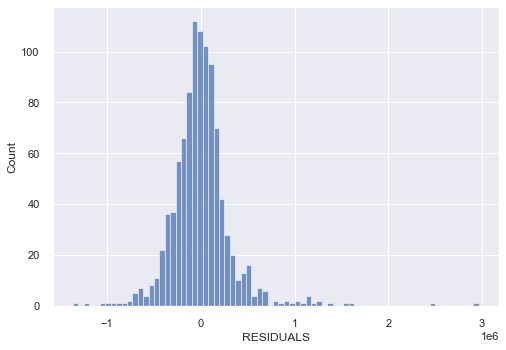

In [129]:
sns.histplot(data=df_sales, x="RESIDUALS")

This histogram of residuals from the sales dataset looks fairly normal.<br> It is slightly skewed to the left because of large outliers.<br> The majority of the data does lie within 2 standard deviations so I would consider this to be approximately normal.

Text(0.5, 1.0, 'Histogram of Residuals')

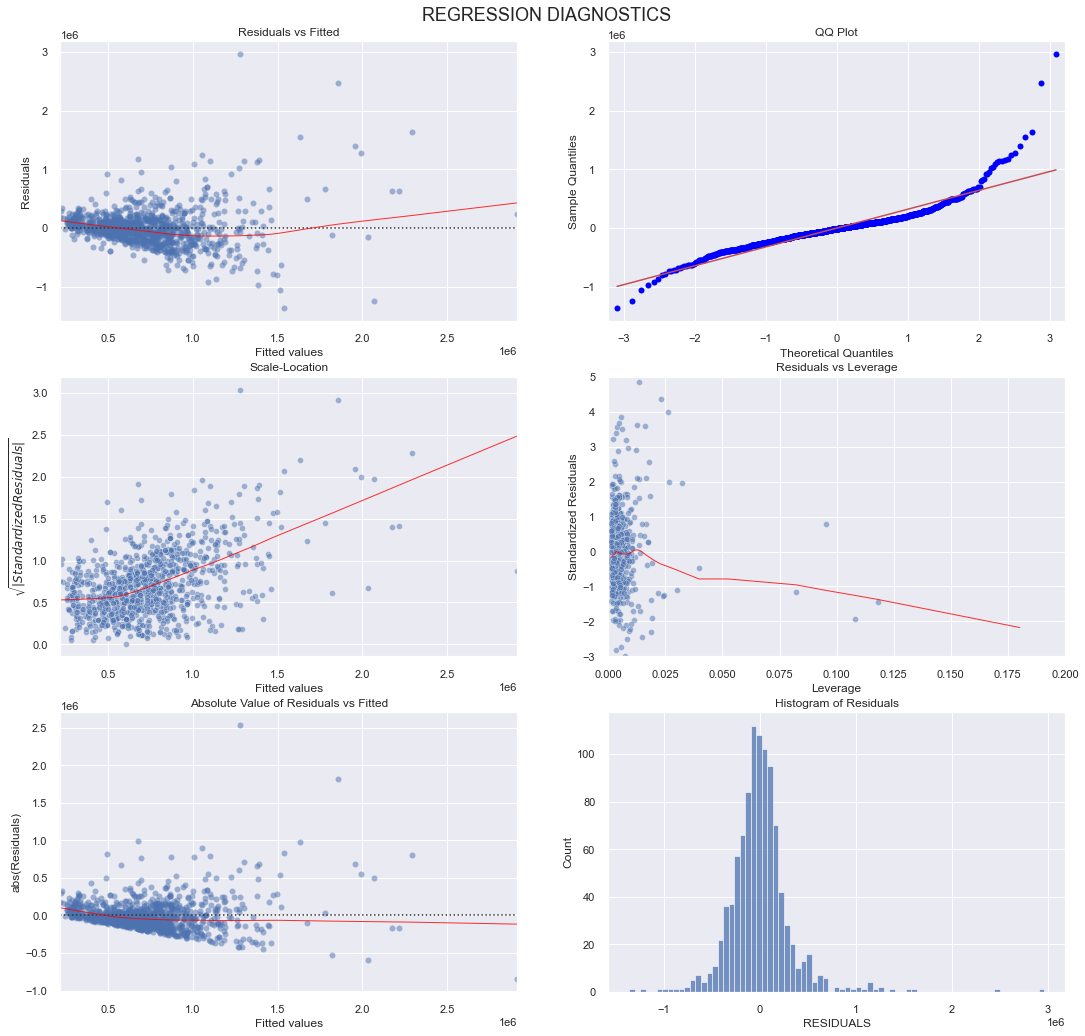

In [133]:
model_fitted_val = df_sales['FITTED_VALUES']
model_residuals = df_sales['RESIDUALS']

fig, axes = plt.subplots(3,2, figsize=(18, 16))
fig.suptitle('REGRESSION DIAGNOSTICS')

plt.subplots_adjust(top=0.95)
sns.residplot(ax = axes[0,0],x = model_fitted_val,y = model_residuals, data=df_sales, 
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[0,0].set_title('Residuals vs Fitted')
axes[0,0].set_xlabel('Fitted values')
axes[0,0].set_ylabel('Residuals');

model_residuals = abs(df_sales['RESIDUALS'])


sns.residplot(ax = axes[2,0],x = model_fitted_val,y = model_residuals, data=df_sales,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[2,0].set_title('Absolute Value of Residuals vs Fitted')
axes[2,0].set_xlabel('Fitted values')
axes[2,0].set_ylabel('abs(Residuals)');

model_norm_residuals = model1.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model1.get_influence().hat_matrix_diag
model_cooks = model1.get_influence().cooks_distance[0]



sns.scatterplot(ax =axes[1,0],x = model_fitted_val, y = model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(ax =axes[1,0],x = model_fitted_val, y = model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[1,0].set_title('Scale-Location')
axes[1,0].set_xlabel('Fitted values')
axes[1,0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

sns.scatterplot(ax =axes[1,1],x = model_leverage, y = model_norm_residuals, alpha=0.5)
sns.regplot(ax = axes[1,1],x = model_leverage, y = model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

axes[1,1].set_xlim(0, 0.20)
axes[1,1].set_ylim(-3, 5)
axes[1,1].set_title('Residuals vs Leverage')
axes[1,1].set_xlabel('Leverage')
axes[1,1].set_ylabel('Standardized Residuals')


sm.qqplot(df_sales['RESIDUALS'], line='s',ax = axes[0,1]);
axes[0,1].set_title('QQ Plot')

sns.histplot(data=df_sales, x="RESIDUALS",ax = axes[2,1])
axes[2,1].set_title('Histogram of Residuals')

__1.3. Assess the linearity assumption of the regression model. Explain by describing a pattern in one or more 
residual plots.__

Looking at the Residual vs Fitted Values plot, we see that there is not a lot of linearity as the line deviates from the 0 line quite a bit.<br> Linearity is a matter of degree and we noted in class that we should not interpret it too strictly, but I would still consider this to be not linear.

__1.4. Assess the constant variance assumption of the regression model. Explain by describing a pattern in 
one or more residual plots.__

Looking at the Residuals vs Fitted Values plot, we see that the spread of residuals is not constant as we move from left to right of the x-axis. This indicates __heteroscedasticity__. We can see that the residuals are clustered in the left and get more disperesed as we move to the right, hence the constant variance assumption does not hold.<br> When we look at the Scale-Location plot, we confirm our standing that constant variance does not hold as the values are dispersing as we move to the left of the plot. 

__1.5. Assess the normality assumption of the linear regression model. Explain by describing a pattern in one 
or more residual plots.__

As we see in the residuals histogram and the qq plot, this model is approximately normal. Most of the values lie within 2 standard deviations but there are a lot of outliers and it skews to the left. Again, normality is a matter of degree so I would assume that this model is fairly normal.

__1.6. Give an overall assessment of how well the assumptions hold for the regression model.__

There are 4 assumptions to make statistical inferences from a linear model : <br> 1. Independence <br> 2. Linearity <br> 3. Constant Variance <br> 4. Normality of errors or large sample size <br> If the sample was collected randomly, we can assume Independece and given the above diagnostics, I would not assume Linearity, I would assume Normality - even though it was approximately normal, we have a large sample size so CLT would hold but the Constant Variance assumption would fail as we could not effectively show that it holds. 

__1.7. Would statistical inferences based on this model be valid? Explain.__

Statistical inferences based on this model would be questioned as the constant variance and linearity assumptions do not hold. <br>If the Linearity assumption does not hold, then we have to interpret the results differently and irrespective of sample size, heteroscedasticity has a significant effect on confidence intervals and hypothesis testing using regression coeffcients. The inferences could be more or less conservative than we expect.

__1.8. Create a new variable (I will call it LOG_PRICE) which is calculated as the log-transformation of the sale 
price variable. Use base-10 logarithms. Fit a linear regression model (Model 2) with LOG_PRICE as 
response variable and SQFT, LOT_SIZE, BEDS, and BATHS as predictor variables. Report the table of 
coefficient estimates with standard errors and p-values.__

In [105]:
df_sales['LOG_PRICE'] = np.log10(df_sales['LAST_SALE_PRICE'])

In [108]:
model2 = ols('LOG_PRICE ~ SQFT + LOT_SIZE + BEDS + BATHS', data=df_sales).fit()
print(model2.summary())

df_sales['RESIDUALS2'] = model2.resid
df_sales['FITTED_VALUES2'] = model2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:              LOG_PRICE   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     199.1
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          1.94e-125
Time:                        20:36:58   Log-Likelihood:                 440.48
No. Observations:                1000   AIC:                            -871.0
Df Residuals:                     995   BIC:                            -846.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4623      0.019    281.479      0.0

__1.9. Give an interpretation of the estimated coefficient of the variable SQFT in Model 2.__

__The coeffcient represents the average difference in the mean of log of the Sale price per unit
difference in Area of the house while keeping the other predictors constant.__<br>.Even though we cannot compare the magnitude of the coeffcient directly with the previous model (because of log), we see that it is not relatively as influential as before because of the log transform of the response variable, which could indicate that the outliers were falsely bloating the weight of SQFT.

Text(0.5, 1.0, 'Histogram of Residuals')

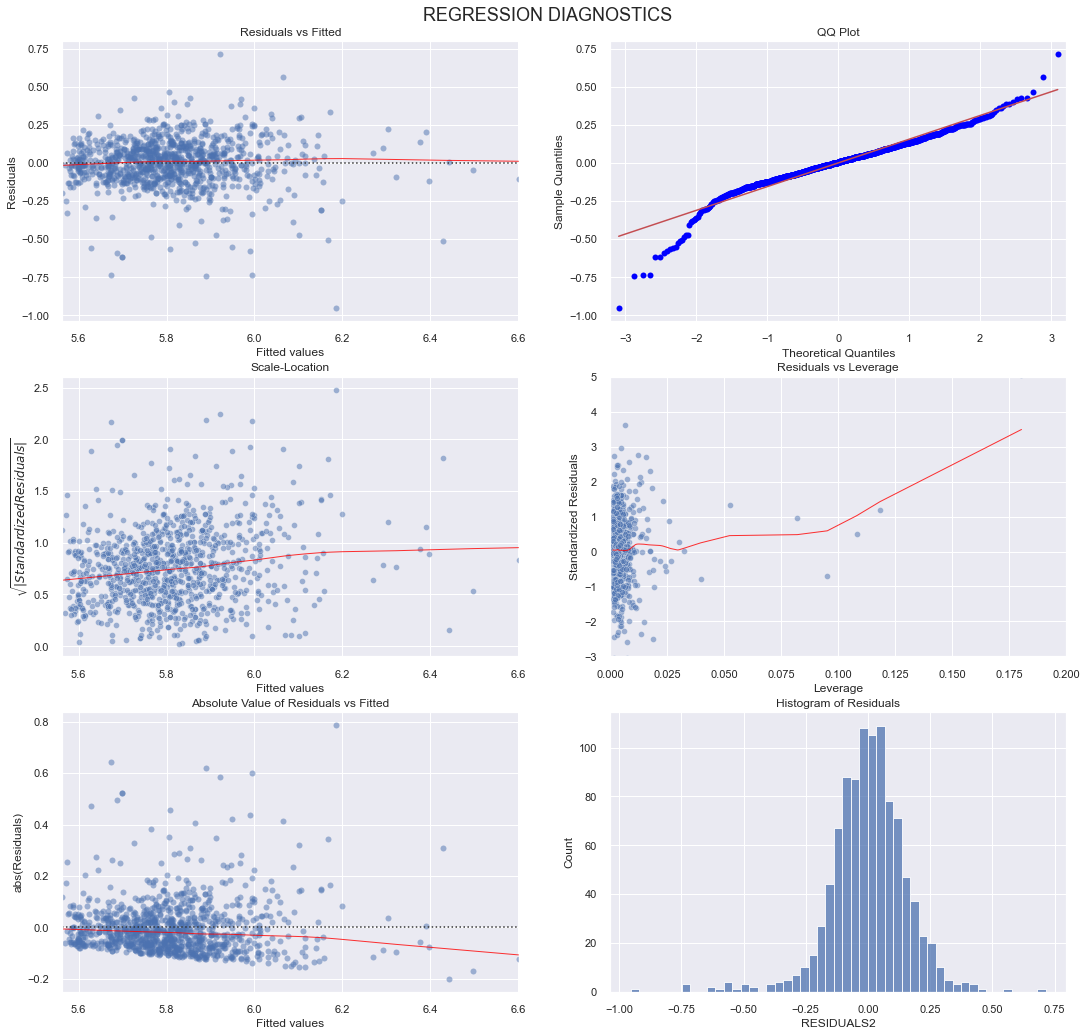

In [119]:
model_fitted_val = df_sales['FITTED_VALUES2']
model_residuals = df_sales['RESIDUALS2']

fig, axes = plt.subplots(3,2, figsize=(18, 16))
fig.suptitle('REGRESSION DIAGNOSTICS')

plt.subplots_adjust(top=0.95)
sns.residplot(ax = axes[0,0],x = model_fitted_val,y = model_residuals, data=df_sales, 
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[0,0].set_title('Residuals vs Fitted')
axes[0,0].set_xlabel('Fitted values')
axes[0,0].set_ylabel('Residuals');

model_residuals = abs(df_sales['RESIDUALS2'])


sns.residplot(ax = axes[2,0],x = model_fitted_val,y = model_residuals, data=df_sales,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[2,0].set_title('Absolute Value of Residuals vs Fitted')
axes[2,0].set_xlabel('Fitted values')
axes[2,0].set_ylabel('abs(Residuals)');

model_norm_residuals = model2.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model2.get_influence().hat_matrix_diag
model_cooks = model2.get_influence().cooks_distance[0]



sns.scatterplot(ax =axes[1,0],x = model_fitted_val, y = model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(ax =axes[1,0],x = model_fitted_val, y = model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[1,0].set_title('Scale-Location')
axes[1,0].set_xlabel('Fitted values')
axes[1,0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

sns.scatterplot(ax =axes[1,1],x = model_leverage, y = model_norm_residuals, alpha=0.5)
sns.regplot(ax = axes[1,1],x = model_leverage, y = model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

axes[1,1].set_xlim(0, 0.20)
axes[1,1].set_ylim(-3, 5)
axes[1,1].set_title('Residuals vs Leverage')
axes[1,1].set_xlabel('Leverage')
axes[1,1].set_ylabel('Standardized Residuals')


sm.qqplot(df_sales['RESIDUALS2'], line='s',ax = axes[0,1]);
axes[0,1].set_title('QQ Plot')

sns.histplot(data=df_sales, x="RESIDUALS2",ax = axes[2,1])
axes[2,1].set_title('Histogram of Residuals')

__1.10. Assess the linearity assumption of Model 2. Explain by describing a pattern in one or more residual.__

When we look at the 2nd Model, we can clearly see from the Residual vs Fitted Values plot that the Linearity assumption holds as the line is almost overlapping the 0 line and the values are distributed more evenly. This shows the degree to which the outliers were affecting the values around the mean because after log the linearity assumption seems more plausible.

__1.11. Assess the constant variance assumption of Model 2. Explain by describing a pattern in one or more 
residual plots.__

From the Residual vs Fitted Values plot, we see that there is homoscedasticity to a degree as the values are more evenly distributed (banded) across the x-axis. <br>
We can assume constant variance for this model.

__1.12. Assess the normality assumption of Model 2. Explain by describing a pattern in one or more residual 
plots.__

After log transform, when we look at the histogram of residuals and the qq plot, we see that the normality assumption holds as most of the values are within 2 standard deviations from the mean and it is less skewed.

__1.13. Give an overall assessment of how well the assumptions hold for Model 2.__

There are 4 assumptions to make statistical inferences from a linear model : <br> 1. Independence <br> 2. Linearity <br> 3. Constant Variance <br> 4. Normality of errors or large sample size <br> If the sample was collected randomly, we can assume Independece and given the above diagnostics, I would assume Linearity, Normality and  constant variance.

__1.14. Would statistical inferences based on Model 2 be valid? Explain.__

Statistical Inferences based on Model 2 would hold for confidence intervals and hypothesis testing using regression coeffcients as we can be fairly confident of the results (Less likely that they are more or less conservative than what we expect).